# First level analysis

In this part, a basic analysis of the bibliographical information is done. The term 'basic'  refers to analyses that can be made by executing queries over a field of the dataframe.

In [1]:
import pandas as pd
from techminer import RecordsDataFrame
records = pd.read_json('cleaned-records.json', orient='records', lines=True)
rdf = RecordsDataFrame(records)

## Number of documents per document type

In [2]:
rdf.documents_by_term('Document Type')

,Document Type,Num Documents
0,Article,266
4,Conference Paper,190
3,Book Chapter,25
7,Review,11
2,Book,7
6,Note,2
1,Article in Press,1
5,Conference Review,1
8,Short Survey,1


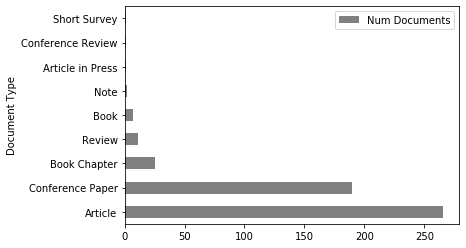

In [3]:
rdf.documents_by_term('Document Type').plot.barh('Document Type', 'Num Documents', color='gray');

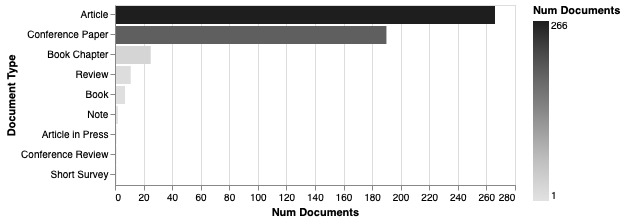

In [4]:
rdf.documents_by_term('Document Type').barhplot_in_altair()

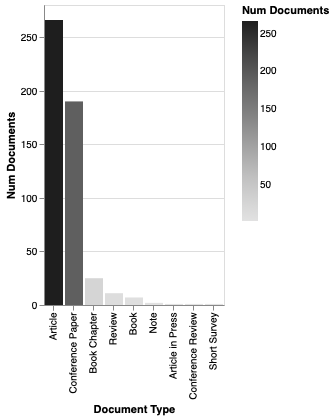

In [5]:
rdf.documents_by_term('Document Type').barplot_in_altair()

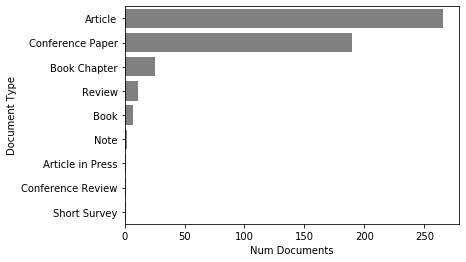

In [6]:
rdf.documents_by_term('Document Type').barhplot_in_seaborn();

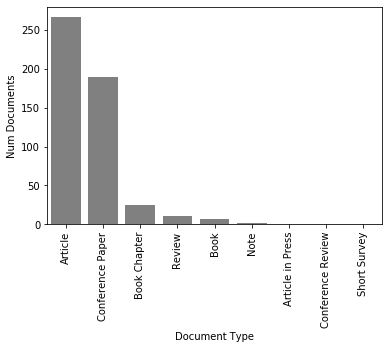

In [7]:
rdf.documents_by_term('Document Type').barplot_in_seaborn();

## Citations per document

In [8]:
rdf.documents_by_term('Cited by')

,Cited by,Num Documents
0,1.0,58
1,2.0,47
2,3.0,31
3,4.0,23
4,5.0,23
6,7.0,20
5,6.0,12
10,11.0,9
9,10.0,8
7,8.0,8


## Number of authors per document

In [9]:
rdf['Num Authors'] = rdf['Author(s) ID'].map(lambda x: len(x.split(';')))
rdf.documents_by_term('Num Authors')

,Num Authors,Num Documents
2,3,163
3,4,133
1,2,89
4,5,67
5,6,32
6,7,9
8,9,3
0,1,2
7,8,2
11,15,2


## Number of documents per source title

In [10]:
rdf.documents_by_term('Source title')

,Source title,Num Documents
209,Lecture Notes in Computer Science (including s...,33
284,Quantitative Finance,15
111,Expert Systems with Applications,11
189,Journal of Financial Markets,8
125,Handbook of High Frequency Trading,7
43,Algorithmic Finance,6
74,Communications in Computer and Information Sci...,6
33,ACM International Conference Proceeding Series,6
279,Proceedings of the International Joint Confere...,5
227,Physica A: Statistical Mechanics and its Appli...,4


## Number of documents per author

In [11]:
rdf.documents_by_term('Authors', sep=',')

,Authors,Num Documents
778,Raudys A.,8
213,Debenham J.,7
816,Sadoghi M.,7
416,Jacobsen H.-A.,7
592,Manahov V.,7
575,Luk W.,6
604,Masteika S.,5
598,Maringer D.,5
32,Andrade H.,5
677,Ng W.L.,5


## Number of documents per keyword

In [12]:
rdf.documents_by_term('keywords (cleaned)', sep=';')

,keywords (cleaned),Num Documents
299,Commerce,230
56,Algorithmic trading,159
1014,High-frequency trading,137
635,Electronic trading,136
804,Financial markets,99
144,Automated trading,65
775,Finance,60
61,Algorithms,56
1191,Investments,52
103,Artificial intelligence,50


## Documents per country

In [13]:
from techminer import extract_country

In [14]:
rdf['Country'] = records['Affiliations'].map(lambda x: extract_country(x, sep=';'))
rdf.documents_by_term('Country', sep=';')

,Country,Num Documents
56,United States,202
55,United Kingdom,125
10,China,92
17,France,41
18,Germany,37
2,Australia,28
8,Canada,24
25,Italy,24
26,Japan,23
6,Brazil,21


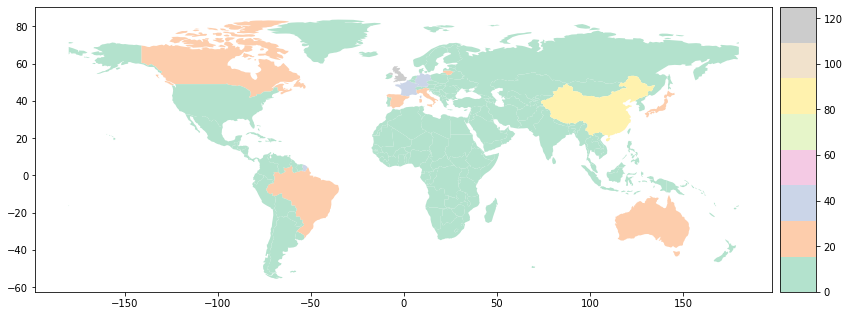

In [15]:
rdf.documents_by_term('Country', sep=';').worldmap()

## Number of documents per year

In [16]:
rdf.documents_by_year()

,Year,Num Documents
0,1994,2
1,1995,0
2,1996,0
3,1997,0
4,1998,0
5,1999,0
6,2000,2
7,2001,1
8,2002,0
9,2003,3


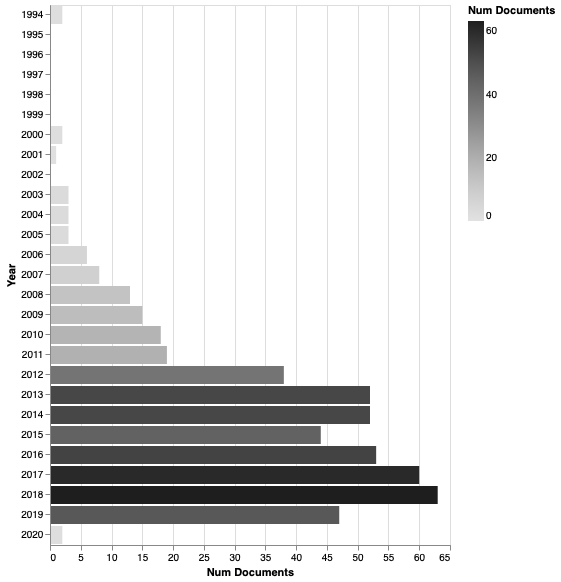

In [17]:
rdf.documents_by_year().barhplot_in_altair()

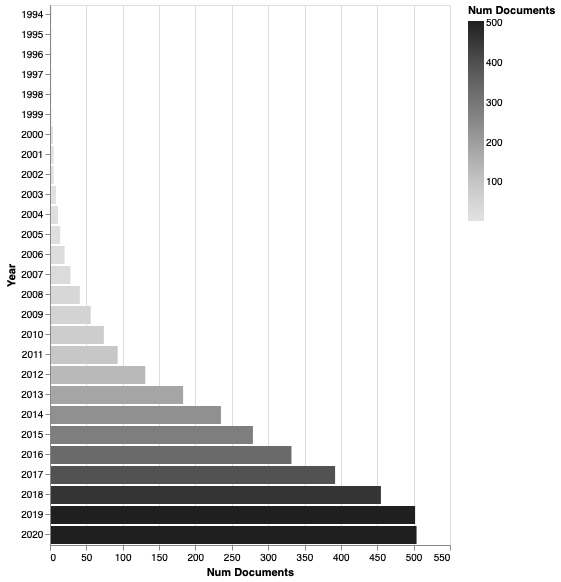

In [18]:
rdf.documents_by_year(cumulative=True).barhplot_in_altair()

## Citations per year

In [19]:
rdf.citations_by_year()

,Year,Cited by
0,1994,3
1,1995,0
2,1996,0
3,1997,0
4,1998,0
5,1999,0
6,2000,23
7,2001,26
8,2002,0
9,2003,54


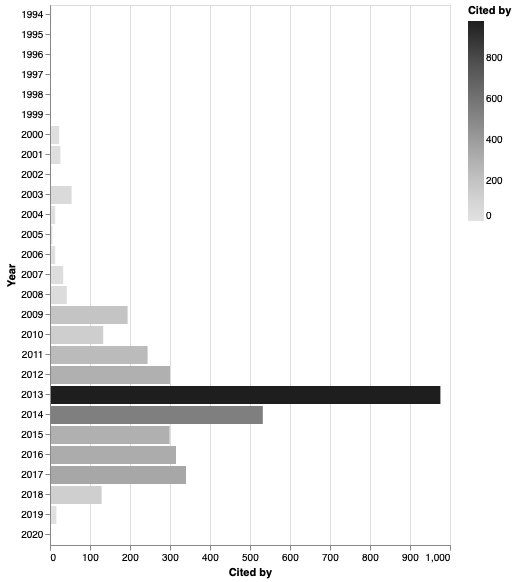

In [20]:
rdf.citations_by_year().barhplot_in_altair()

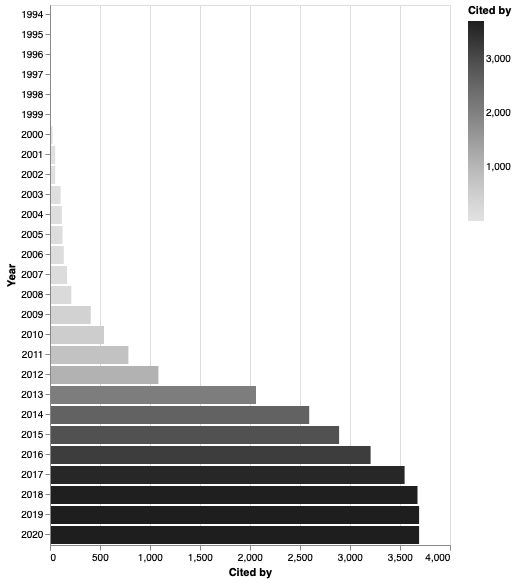

In [21]:
rdf.citations_by_year(cumulative=True).barhplot_in_altair()